In [222]:
import pandas as pd

data = pd.read_csv("data.csv")

df = pd.DataFrame(data)

df.head()

,Edibility,Cap-shape,Cap-surface,Cap-color,bruises?,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


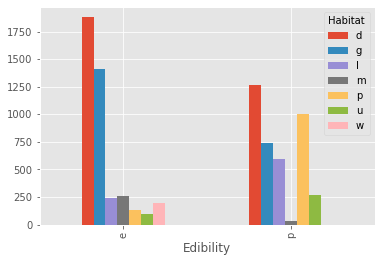

In [223]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df[['Edibility', 'Habitat']].groupby(['Edibility', 'Habitat']).Edibility.count().unstack().plot.bar(legend = True)

plt.show()

In [224]:
dummies = pd.get_dummies(df, columns = df.columns)

dummies

,Edibility_e,Edibility_p,Cap-shape_b,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_f,Cap-surface_g,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(dummies)

vectors

<119x94 sparse matrix of type '<class 'numpy.float64'>'
	with 275 stored elements in Compressed Sparse Row format>

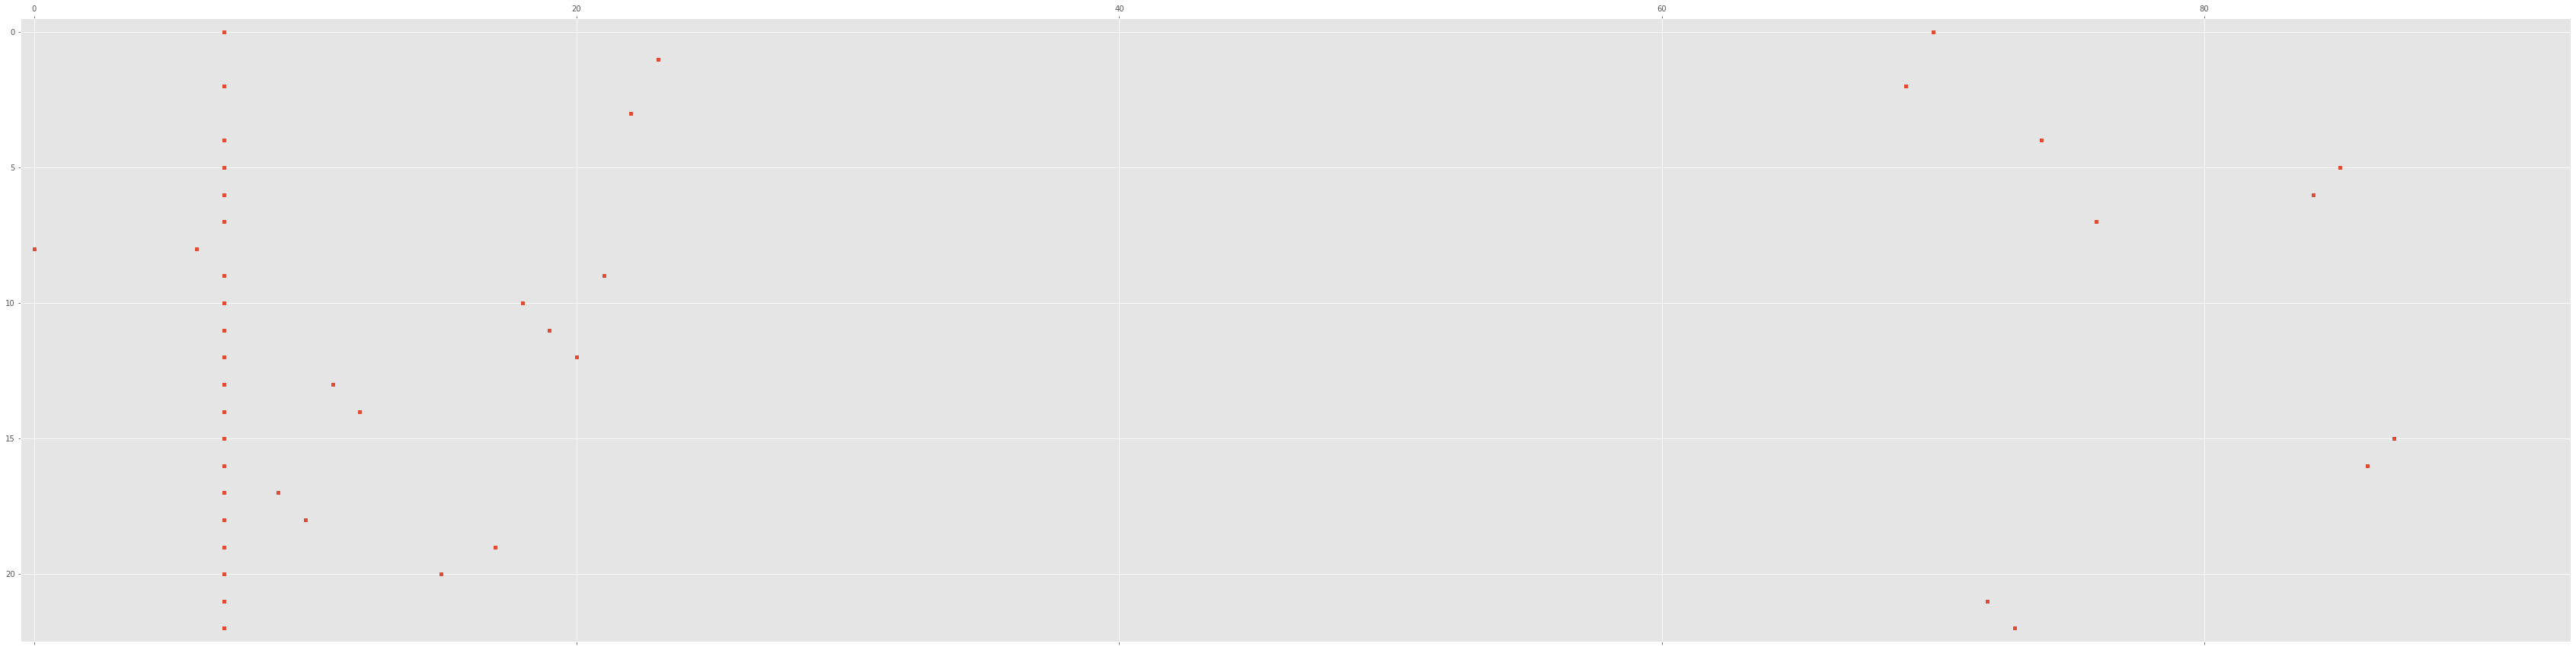

In [226]:
import numpy as np

indicies = np.argsort(dummies.columns)
plt.spy(vectors[indices], markersize = 4)
fig = plt.gcf()
fig.set_size_inches(60, 100)
plt.plot()
plt.show()